In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [3]:
#use_sparsity_constraint = True
nb_epoch = 100

In [4]:
# this is our input placeholder
input_img = Input(shape=(784,))
#encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

W0821 22:57:35.530014 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 22:57:35.548345 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 22:57:35.550779 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [6]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [7]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0821 22:57:35.667855 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 22:57:35.679906 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 22:57:35.683632 140148418574080 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=nb_epoch,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

W0821 22:57:36.236785 140148418574080 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.3436 - val_loss: 0.2646
Epoch 2/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2565 - val_loss: 0.2475
Epoch 3/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2346 - val_loss: 0.2237
Epoch 4/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2153 - val_loss: 0.2054
Epoch 5/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1988 - val_loss: 0.1934
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1877 - val_loss: 0.1821
Epoch 7/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1795 - val_loss: 0.1745
Epoch 8/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1729 - val_loss: 0.1708
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1682 - val_loss: 0.1

In [20]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test)

In [30]:
print(x_test.mean())
print(decoded_imgs.mean())

0.13251467
0.13526022


In [31]:
print(encoded_imgs.mean())
print(encoded_imgs.std())

5.11614
3.682132


In [22]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


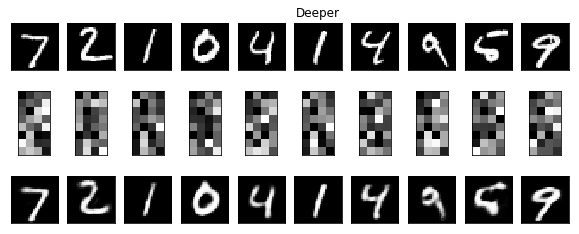

In [28]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    if i==n//2:
        plt.title('Deeper')
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, n, i + 1 + 1*n)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

References
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95